In [67]:
import matplotlib.pyplot as plt
import math
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
import keras 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
df = pd.read_csv('XAU5Y.csv')
df

,Date,Open,High,Low,Close
0,7/8/2016,1360.45,1370.39,1335.47,1366.33
1,7/11/2016,1369.70,1375.34,1350.90,1355.40
2,7/12/2016,1355.38,1357.86,1330.41,1333.10
3,7/13/2016,1333.05,1345.41,1327.61,1342.64
4,7/14/2016,1342.65,1347.27,1320.35,1335.23
...,...,...,...,...,...
1266,5/24/2021,1882.03,1887.07,1875.25,1881.02
1267,5/25/2021,1881.02,1900.29,1872.78,1899.25
1268,5/26/2021,1899.25,1912.76,1890.78,1896.67
1269,5/27/2021,1896.68,1903.70,1888.34,1896.54


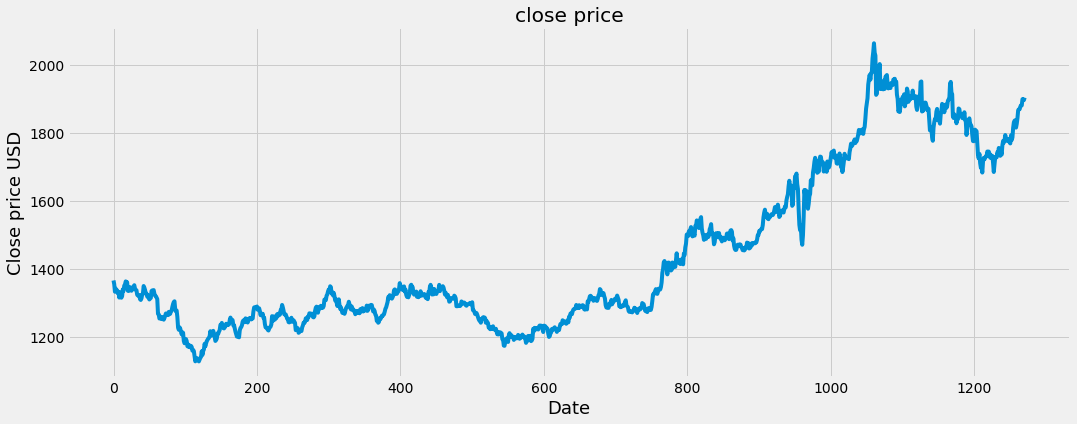

In [68]:
#seeing the data 
plt.figure(figsize=(16,6))
plt.title('close price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.show()

In [70]:
#create data frame with close 
data = df.filter(['Close'])
dataset = data.values
#getting rows 
training_data_length = math.ceil(len(dataset)*.8)
training_data_length
#scaling 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
training_data_length, scaled_data

(1017,
 array([[0.25444844],
        [0.2427606 ],
        [0.21891441],
        ...,
        [0.82155995],
        [0.82142093],
        [0.82915223]]))

In [71]:
#create training dataset for scaled data 
train_data = scaled_data[0:training_data_length, :]
x_train = []
y_train = []
for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i,0])
    y_train.append(train_data[i,0])
    if i<= 121:
        print(x_train)
        print(y_train)
        print()
#making trainable arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

[array([2.54448437e-01, 2.42760597e-01, 2.18914410e-01, 2.29115873e-01,
       2.21192095e-01, 2.23566021e-01, 2.14369734e-01, 2.17748834e-01,
       2.00692930e-01, 2.17128620e-01, 2.07825399e-01, 2.00201035e-01,
       2.05184140e-01, 2.26378374e-01, 2.21748150e-01, 2.38354934e-01,
       2.40354592e-01, 2.51497070e-01, 2.45733350e-01, 2.48909278e-01,
       2.22015484e-01, 2.21277642e-01, 2.27073442e-01, 2.33361136e-01,
       2.24988237e-01, 2.21983404e-01, 2.25651225e-01, 2.32965482e-01,
       2.35628128e-01, 2.39509817e-01, 2.27864750e-01, 2.25319731e-01,
       2.23683648e-01, 2.09322469e-01, 2.07012704e-01, 2.06167928e-01,
       2.08520467e-01, 1.95399718e-01, 1.93111339e-01, 1.98372471e-01,
       2.10477351e-01, 2.12477009e-01, 2.36986184e-01, 2.31831986e-01,
       2.24474956e-01, 2.13279011e-01, 2.13268318e-01, 2.03890243e-01,
       2.08049959e-01, 1.99292100e-01, 1.94587023e-01, 1.97623936e-01,
       1.99388340e-01, 2.21127935e-01, 2.23159673e-01, 2.23683648e-01,
     

(897, 120, 1)

In [72]:
#build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
#train model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
897/897 [==============================] - 48s 53ms/step - loss: 0.0015


In [75]:
#testing dataset 
#897 to 1271
test_data = scaled_data[training_data_length - 120: , :]
x_test = []
y_test= dataset[training_data_length:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i,0])
#back to numpy array 
x_test = np.array(x_test)
#make data 3d 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

C:\Users\codey\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


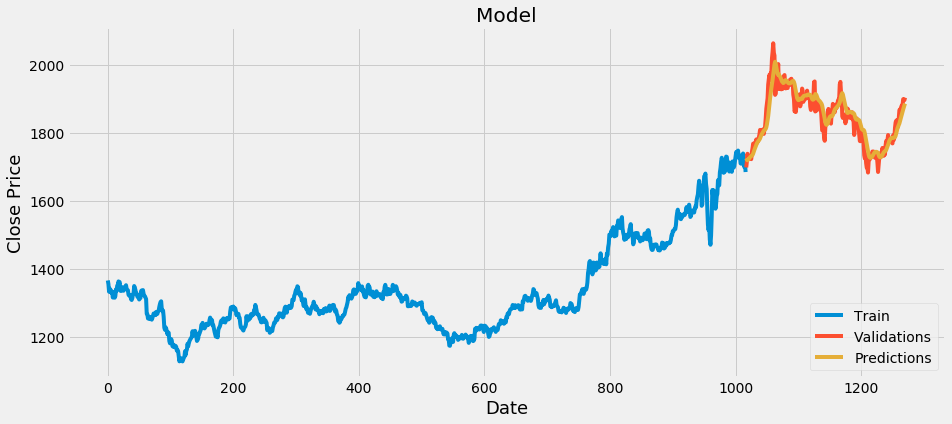

(None,
         Close  Predictions
 1017  1698.53  1725.625000
 1018  1715.33  1721.438232
 1019  1738.70  1719.554077
 1020  1727.70  1721.342407
 1021  1730.75  1723.719360
 ...       ...          ...
 1266  1881.02  1863.281860
 1267  1899.25  1868.936890
 1268  1896.67  1875.392334
 1269  1896.54  1881.252319
 1270  1903.77  1886.226562
 
 [254 rows x 2 columns])

In [79]:
#prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
#plots 
train = data[:training_data_length]
validation = data[training_data_length:]
validation['Predictions'] = predictions 
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train', 'Validations', 'Predictions'], loc='lower right')
plt.show(), validation

In [82]:
#attempting to predict the closing price for 5/31/2021
new_df = df.filter(['Close'])
last_120_days = new_df[-120:].values 
last_120_days_scaled = scaler.transform(last_120_days)
X_test =[]
X_test.append(last_120_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1890.9777]]
